# Comparaciones entre ambos modelos
Cuaderno dedicado para las comparaciones entre el modelo determinista y el estocástico.

In [3]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from math import log
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.collections import LineCollection

print("Current working directory:", os.getcwd()) # hay que estar en ...\TFG para que funcione todo


Current working directory: z:\Codes\TFG


## 1. Comparaciones directas 

---

## 2. Validaciones Numéricas

### 2.1. Divergencia de las trayectorias
Usamos diferentes métodos de integración para hallar las soluciones a los distintos modelos. Sabemos que habrá discrepancias en el tiempo. 
Nos interesa ver el error que introduce el método de Euler-Maruyama respecto al RK45. Para esto, aplicamos ambos métodos para el sistema determinista.

In [8]:
# definimos los parametros del sistema
r = np.array(
    [1, 0.72, 1.53, 1.27]
)

a = np.array([
    [1, 1.09, 1.52, 0],
    [0, 1, 0.44, 1.36],
    [2.33, 0, 1, 0.47],
    [1.21, 0.51, 0.35, 1]
])

x0 = np.array([0.5, 0.5, 0.5, 0.5])

In [116]:
# creamos ambos sistemas
from src.det_system import DeterministicSystem
from src.stoc_system import StochasticSystem

# parametros para ambas simulaciones
t_total = 500
dt = 0.00005 # probamos primero con 0.0005
n_steps = int(t_total / dt) # numero de pasos de tiempo
sigma0 = np.array([0, 0, 0, 0]) # ruido en el sistema estocastico

det_sys = DeterministicSystem(r, a, x0, t_total) 
stoc_sys_05 = StochasticSystem(r, a, x0, t_total, dt = 0.05, sigma = sigma0)
stoc_sys_005 = StochasticSystem(r, a, x0, t_total, dt = 0.005, sigma = sigma0)
stoc_sys_0005 = StochasticSystem(r, a, x0, t_total, dt = 0.0005, sigma = sigma0)
stoc_sys_00005 = StochasticSystem(r, a, x0, t_total, dt = 0.00005, sigma = sigma0)

print("Numero de puntos del sist. est. = ", n_steps)


Numero de puntos del sist. est. =  10000000


In [117]:
# hallamos las soluciones de ambos sistemas
det_T_05, det_X_05 = det_sys.RK45(n_steps = int(t_total / 0.05))
det_T_005, det_X_005 = det_sys.RK45(n_steps = int(t_total / 0.005))
det_T_0005, det_X_0005 = det_sys.RK45(n_steps = int(t_total / 0.0005))
det_T_00005, det_X_00005 = det_sys.RK45(n_steps = int(t_total / 0.00005))

stoc_T_05, stoc_X_05 = stoc_sys_05.euler_maruyama()
stoc_T_005, stoc_X_005 = stoc_sys_005.euler_maruyama()
stoc_T_0005, stoc_X_0005 = stoc_sys_0005.euler_maruyama()
stoc_T_00005, stoc_X_00005 = stoc_sys_00005.euler_maruyama()

In [118]:
# hallamos la diferencia RK45-EM para cada dt
dif_05 = det_X_05[0] - stoc_X_05[:-1,0]
dif_005 = det_X_005[0] - stoc_X_005[:-1,0]
dif_0005 = det_X_0005[0] - stoc_X_0005[:-1,0]
dif_00005 = det_X_00005[0] - stoc_X_00005[:-1,0]

Representamos ambas trayectorias en la misma gráfica:

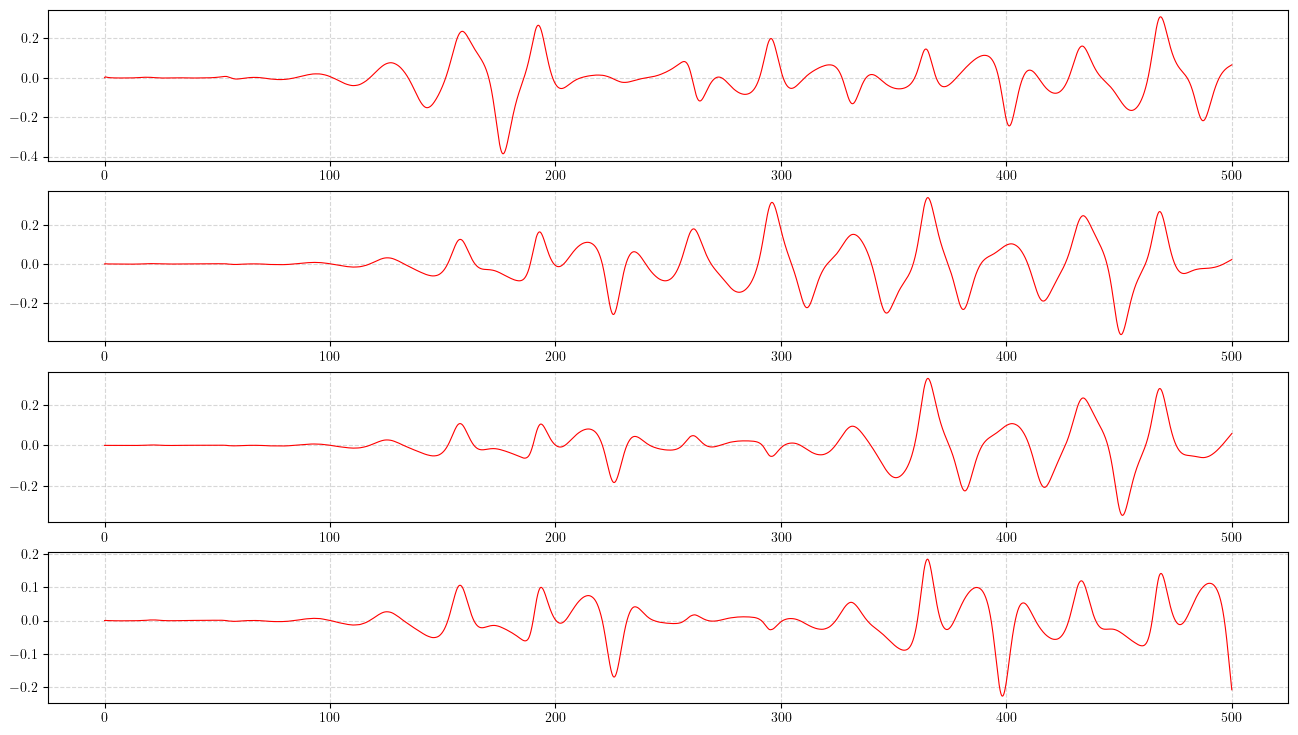

In [127]:
import matplotlib.lines as mlines
fig, ax = plt.subplots(4, 1, figsize=(16, 9))

# ponemos las diferencias para cada dt
ax[0].plot(det_T_05, dif_05, lw=0.8, color = 'r')
ax[1].plot(det_T_005, dif_005, lw=0.8, color = 'r')
ax[2].plot(det_T_0005, dif_0005, lw=0.8, color = 'r')
ax[3].plot(det_T_00005, dif_00005, lw=0.8, color = 'r')


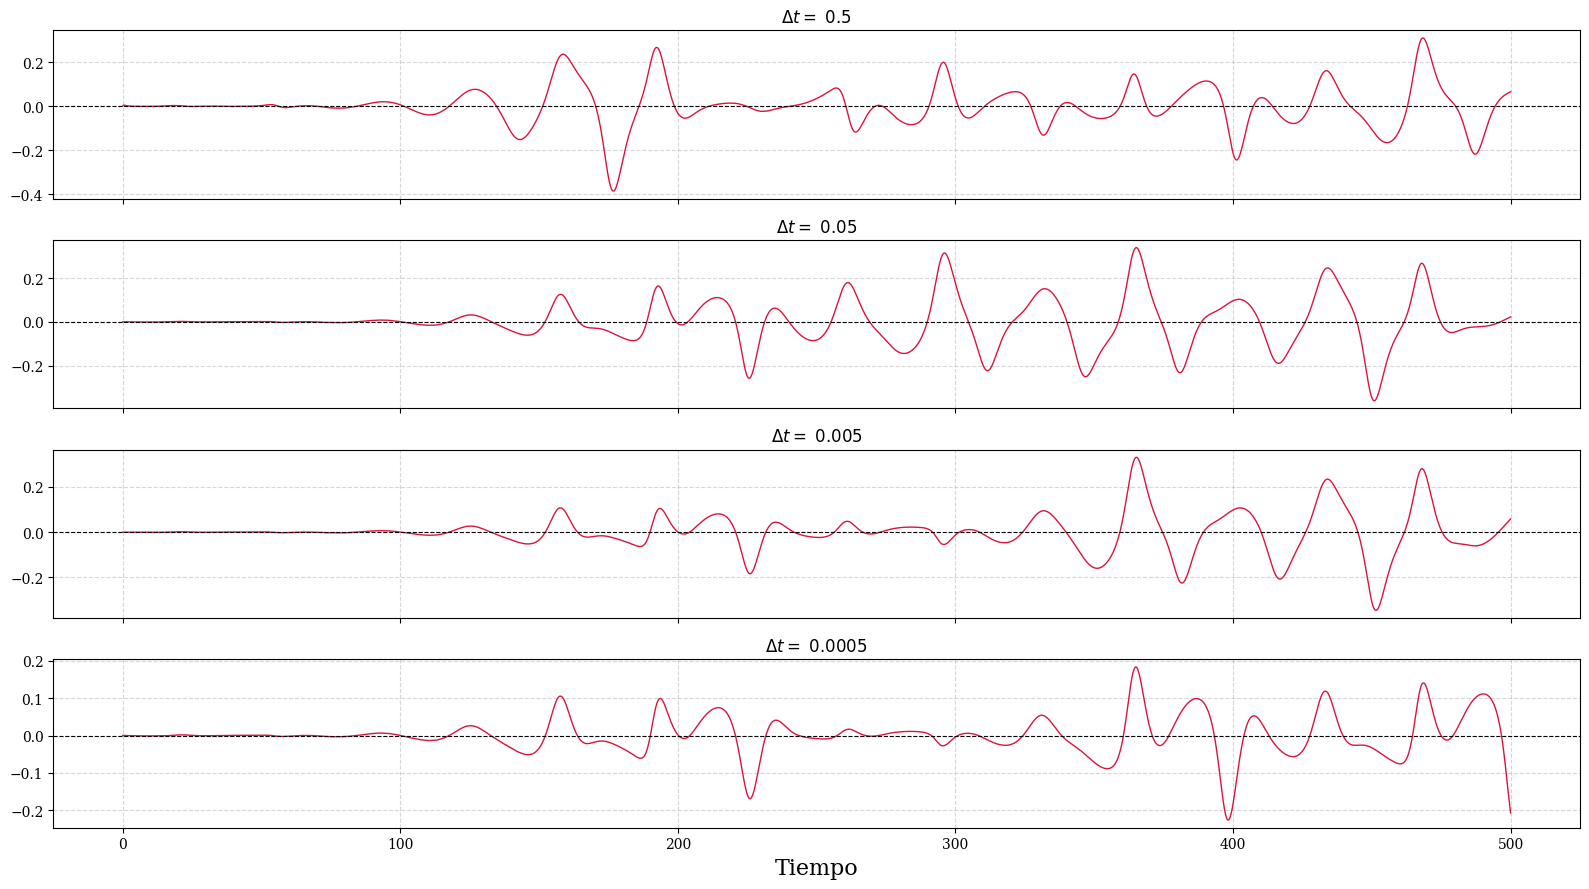

In [139]:

fig, axes = plt.subplots(4, 1, figsize=(16, 9), sharex=True)

datasets = [
    (det_T_05,    dif_05,    0.5),
    (det_T_005,   dif_005,   0.05),
    (det_T_0005,  dif_0005,  0.005),
    (det_T_00005, dif_00005, 0.0005),
]

for ax, (x, y, dt) in zip(axes, datasets):
    ax.plot(x, y, color='crimson', lw=1)
    ax.axhline(0, color='k', lw=0.8, linestyle='--')
    # ax.set_ylabel('Diferencia') 
    ax.set_title(r'$\Delta t =\ ' + f'{dt}$')

axes[-1].set_xlabel('Tiempo', fontsize=16)
plt.tight_layout()
plt.show()



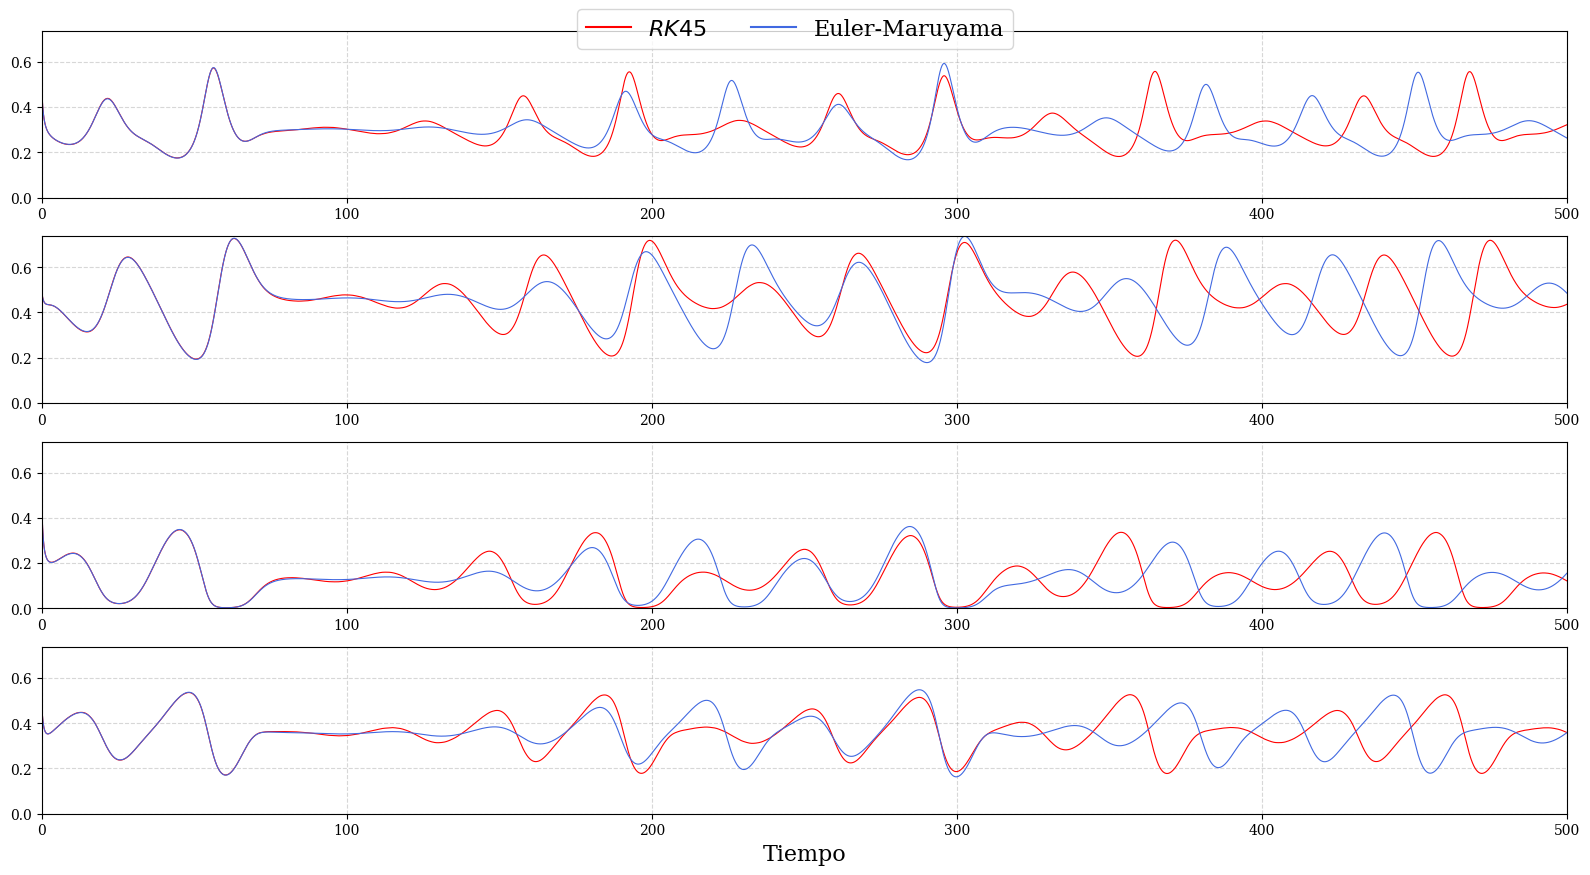

In [138]:
import matplotlib.lines as mlines
fig, ax = plt.subplots(4, 1, figsize=(16, 9))

# primero las soluciones de RK45 (determinista)
ax[0].plot(det_T_0005, det_X_0005[0], lw=0.8, color = 'r')
ax[1].plot(det_T_0005, det_X_0005[1], lw=0.8, color = 'r')
ax[2].plot(det_T_0005, det_X_0005[2], lw=0.8, color = 'r')
ax[3].plot(det_T_0005, det_X_0005[3], lw=0.8, color = 'r')

# ahora las de Euler-Maruyama (estocastico) con dt = 0.0005
ax[0].plot(stoc_T_0005, stoc_X_0005[:, 0], lw=0.8, color = 'royalblue', alpha = 1)
ax[1].plot(stoc_T_0005, stoc_X_0005[:, 1], lw=0.8, color = 'royalblue', alpha = 1)
ax[2].plot(stoc_T_0005, stoc_X_0005[:, 2], lw=0.8, color = 'royalblue', alpha = 1)
ax[3].plot(stoc_T_0005, stoc_X_0005[:, 3], lw=0.8, color = 'royalblue', alpha = 1)


# Ajustes generales para cada subplot
max_y = max(det_X.max(), stoc_X_05.max())   
for i in range(4):
    ax[i].set_xlim(0, t_total)
    ax[i].set_ylim(0, max_y)
    ax[i].grid(True)

# Creamos dos "dummy" lines para la leyenda global.
line_solv = mlines.Line2D([], [], color='r', label=f'$RK45$')
line_em = mlines.Line2D([], [], color='royalblue', label=f'Euler-Maruyama')


# Agregamos la leyenda global en la parte superior central de la figura.
fig.legend(handles=[line_solv, line_em],
           loc='upper center',
           bbox_to_anchor=(0.5, 0.98),
           ncol=2,
           fontsize=16)

ax[3].set_xlabel('Tiempo', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Lo más óptimo es usar $10^6$ puntos para las trayectorias, ya que en general converge suficientemente bien. Sin embargo, para hallar varios LCEs con el método de Wolf es inviable: tardaría mucho. Para esos barridos, usaremos $10^5$ puntos.